
**Refrences**

https://medium.com/@ageitgey/machine-learning-is-fun-part-4-modern-face-recognition-with-deep-learning-c3cffc121d78

https://github.com/ageitgey/face_recognition


In [1]:
!pip install face-recognition

Processing  index.png
[False, False, False]
Processing  obama2.jpg


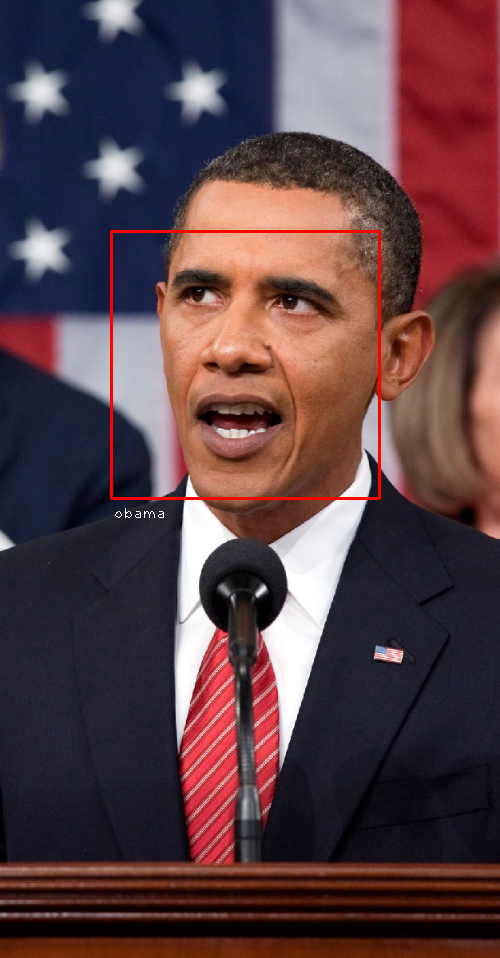

[True, False, False]
Processing  john2.jpeg


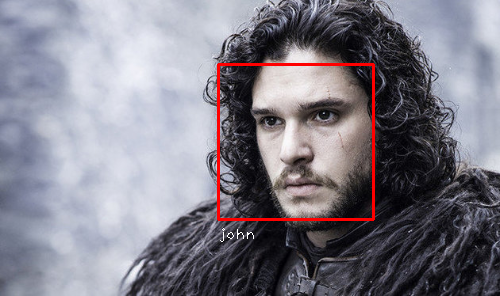

[False, True, False]
Processing  Elon_Musk_Royal_Society.jpg


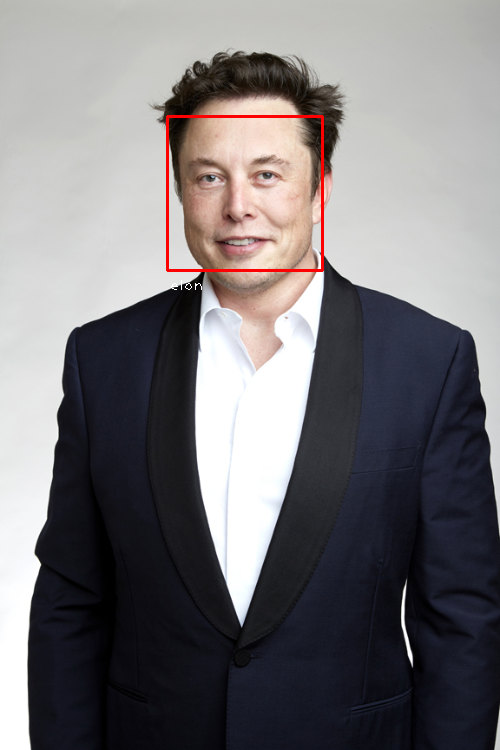

[False, False, True]


In [2]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

# Firstly we will resize the images to a standard size 
def read_img(path):
  img = cv2.imread(path)
  (h, w) = img.shape[:2]
  width = 500
  ratio = width / float(w)
  height = int(h * ratio)
  return cv2.resize(img, (width, height))

known_encodings = []
known_names = []
known_dir = '/content/drive/My Drive/GOOGLE COLAB NOTEBOOKS/FACIAL RECOGNITION/Known'

# storing the data of known faces by encoding them
for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])

# Now checking the unkown images
unknown_dir = '/content/drive/My Drive/GOOGLE COLAB NOTEBOOKS/FACIAL RECOGNITION/Unknown'

for file in os.listdir(unknown_dir):
  print("Processing ", file)
  img = read_img(unknown_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]

  results = face_recognition.compare_faces(known_encodings, img_enc)
  # results = face_recognition.face_distance(known_encodings, img_enc)

  for i in range(len(results)):
    if results[i]:
      name = known_names[i]
      (top, right, bottom, left) = face_recognition.face_locations(img)[0]
      cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
      cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
      cv2_imshow(img)

  print(results)